<a href="https://colab.research.google.com/github/DeepFluxion/IBMEC_Aprendizado_Reforco/blob/main/GridWorld_Project/Aula_18_Cliff_World.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXECUTE A CÉLULA ABAIXO CASO ESTEJA NO COLAB
---
CASO CONTÁRIO PULE

In [1]:
# Célula 1: Upload dos arquivos Python
try:
    from google.colab import files

    print("📤 Faça upload dos 3 arquivos Python:")
    print("   1. environment.py")
    print("   2. algorithms.py")
    print("   3. visualization.py")
    print()

    uploaded = files.upload()

    print("\n✅ Arquivos carregados com sucesso!")
    print(f"   Total: {len(uploaded)} arquivo(s)")
except:
    print('Caso esteja executando local baixe os arquivos do Github e passe para os imports')

📤 Faça upload dos 3 arquivos Python:
   1. environment.py
   2. algorithms.py
   3. visualization.py



Saving algorithms.py to algorithms.py
Saving environment.py to environment.py
Saving visualization.py to visualization.py

✅ Arquivos carregados com sucesso!
   Total: 3 arquivo(s)


# 🏔️ Guia: Modificando o Cliff World

## 📋 Visão Geral

O Cliff World agora é **totalmente configurável**! Você pode ajustar:
- Tamanho do grid
- Penalidade do cliff (precipício)
- Recompensa do objetivo
- Custo por passo
- Ruído (determinístico vs estocástico)
- Fator de desconto

---

## 🎯 Configuração Padrão

```python
from environment import create_cliff_world

# Cliff World padrão (4x8, determinístico)
gw = create_cliff_world()
```

In [2]:
from environment import create_cliff_world

# Cliff World padrão (4x8, determinístico)
gw = create_cliff_world()

**Layout padrão:**
```
[ ] [ ] [ ] [ ] [ ] [ ] [ ] [G]  ← Goal (+0)
[ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ]
[ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ]
[S] [C] [C] [C] [C] [C] [C] [C]  ← Cliff (-100)
```

**Parâmetros padrão:**
- Tamanho: 4 linhas × 8 colunas
- Cliff reward: -100
- Goal reward: 0
- Living reward: -1 (custo por passo)
- Gamma: 0.9
- Noise: 0.0 (determinístico)

---

## 🔧 Modificações Comuns

### 1. Cliff World Maior

```python
# Grid 6x12 (mais espaço)
gw = create_cliff_world(rows=6, cols=12)
```

In [3]:
# Grid 6x12 (mais espaço)
gw = create_cliff_world(rows=6, cols=12)

**Layout:**
```
[ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [G]
[ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ]
[ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ]
[ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ]
[ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ] [ ]
[S] [C] [C] [C] [C] [C] [C] [C] [C] [C] [C] [C]
```

### 2. Cliff Menos Punitivo

```python
# Penalidade menor (-50 em vez de -100)
gw = create_cliff_world(cliff_reward=-50.0)

# Ou muito menos punitivo
gw = create_cliff_world(cliff_reward=-10.0)
```

**Efeito:** Agente fica menos "medo" do cliff, pode explorar mais.

In [4]:
# Penalidade menor (-50 em vez de -100)
gw = create_cliff_world(cliff_reward=-50.0)

# Ou muito menos punitivo
gw = create_cliff_world(cliff_reward=-10.0)

### 3. Objetivo Positivo

```python
# Goal com recompensa positiva
gw = create_cliff_world(goal_reward=10.0)

# Goal muito positivo
gw = create_cliff_world(goal_reward=100.0)
```

**Efeito:** Agente é mais motivado a alcançar o objetivo.

In [5]:
gw = create_cliff_world(goal_reward=10.0)

# Goal muito positivo
gw = create_cliff_world(goal_reward=100.0)

### 4. Custo de Vida Diferente

```python
# Sem custo (living_reward = 0)
gw = create_cliff_world(living_reward=0.0)

# Custo alto (incentiva caminhos curtos)
gw = create_cliff_world(living_reward=-5.0)

# Custo muito baixo
gw = create_cliff_world(living_reward=-0.1)
```

**Efeito do living_reward:**
- Negativo: Incentiva caminhos curtos
- Zero: Não há pressa
- Positivo: Incentiva episódios longos (raramente usado)

In [6]:
# Sem custo (living_reward = 0)
gw = create_cliff_world(living_reward=0.0)

# Custo alto (incentiva caminhos curtos)
gw = create_cliff_world(living_reward=-5.0)

# Custo muito baixo
gw = create_cliff_world(living_reward=-0.1)

### 5. Cliff World Estocástico

```python
# Com 10% de ruído
gw = create_cliff_world(noise=0.1)

# Com 20% de ruído (como GridWorld clássico)
gw = create_cliff_world(noise=0.2)
```

**Efeito:** Movimentos são incertos, tornando o problema mais difícil.

In [7]:
# Com 10% de ruído
gw = create_cliff_world(noise=0.1)

# Com 20% de ruído (como GridWorld clássico)
gw = create_cliff_world(noise=0.2)

### 6. Configuração Completa Customizada

```python
gw = create_cliff_world(
    rows=5,
    cols=10,
    cliff_reward=-75.0,
    goal_reward=50.0,
    living_reward=-2.0,
    gamma=0.95,
    noise=0.1
)
```

In [8]:
gw = create_cliff_world(
    rows=5,
    cols=10,
    cliff_reward=-75.0,
    goal_reward=50.0,
    living_reward=-2.0,
    gamma=0.95,
    noise=0.1
)

---

## 🎨 Exemplos de Configurações Interessantes

### Configuração 1: "Easy Cliff" (Fácil para aprender)

```python
gw_easy = create_cliff_world(
    rows=4,
    cols=8,
    cliff_reward=-20.0,      # Menos punitivo
    goal_reward=10.0,        # Objetivo positivo
    living_reward=-0.5,      # Pouco custo
    noise=0.0                # Determinístico
)
```

**Uso:** Bom para primeiros experimentos, convergência rápida.

In [9]:
gw_easy = create_cliff_world(
    rows=4,
    cols=8,
    cliff_reward=-20.0,      # Menos punitivo
    goal_reward=10.0,        # Objetivo positivo
    living_reward=-0.5,      # Pouco custo
    noise=0.0                # Determinístico
)

### Configuração 2: "Hard Cliff" (Difícil, mais realista)

```python
gw_hard = create_cliff_world(
    rows=6,
    cols=12,
    cliff_reward=-100.0,     # Muito punitivo
    goal_reward=0.0,         # Sem prêmio
    living_reward=-2.0,      # Alto custo
    noise=0.2                # Estocástico
)
```

**Uso:** Testa robustez dos algoritmos, convergência lenta.

In [10]:
gw_hard = create_cliff_world(
    rows=6,
    cols=12,
    cliff_reward=-100.0,     # Muito punitivo
    goal_reward=0.0,         # Sem prêmio
    living_reward=-2.0,      # Alto custo
    noise=0.2                # Estocástico
)

### Configuração 3: "Risky vs Safe" (Comparar estratégias)

```python
# Esta configuração força decisão entre:
# - Caminho arriscado (curto, perto do cliff)
# - Caminho seguro (longo, longe do cliff)

gw_risky = create_cliff_world(
    rows=4,
    cols=8,
    cliff_reward=-100.0,     # Cliff muito punitivo
    goal_reward=0.0,
    living_reward=-1.0,      # Custo moderado
    noise=0.1                # Um pouco de ruído
)
```

**Uso:** Estudar diferença entre SARSA (conservador) e Q-Learning (agressivo).

In [11]:
# Esta configuração força decisão entre:
# - Caminho arriscado (curto, perto do cliff)
# - Caminho seguro (longo, longe do cliff)

gw_risky = create_cliff_world(
    rows=4,
    cols=8,
    cliff_reward=-100.0,     # Cliff muito punitivo
    goal_reward=0.0,
    living_reward=-1.0,      # Custo moderado
    noise=0.1                # Um pouco de ruído
)

### Configuração 4: "Mini Cliff" (Rápido para testes)

```python
### Configuração 4: "Mini Cliff" (Rápido para testes)

```python
gw_mini = create_cliff_world(
    rows=3,
    cols=5,
    cliff_reward=-50.0,
    goal_reward=5.0,
    living_reward=-0.5,
    noise=0.0
)
```

**Layout:**
```
[ ] [ ] [ ] [ ] [G]
[ ] [ ] [ ] [ ] [ ]
[S] [C] [C] [C] [ ]
```

**Uso:** Testes rápidos, debug de código.

In [12]:
gw_mini = create_cliff_world(
    rows=3,
    cols=5,
    cliff_reward=-50.0,
    goal_reward=5.0,
    living_reward=-0.5,
    noise=0.0
)

---

## 📊 Experimentos Interessantes

### Experimento 1: Efeito do Cliff Reward

```python
from environment import create_cliff_world
from algorithms import q_learning, sarsa
from visualization import plot_learning_curves

# Testar diferentes penalidades
cliff_rewards = [-10, -50, -100, -200]
results = {}

for cr in cliff_rewards:
    gw = create_cliff_world(cliff_reward=cr)
    Q, rewards = q_learning(gw, n_episodes=500)
    results[f'Cliff={cr}'] = rewards

plot_learning_curves(results, title="Efeito da Penalidade do Cliff")
```

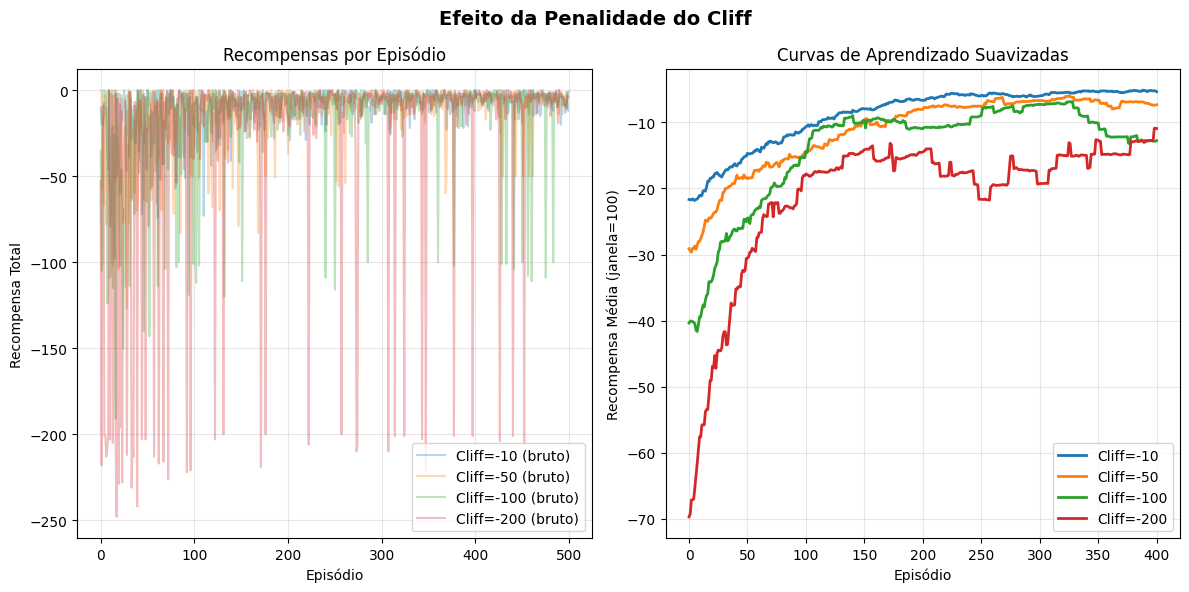

In [13]:
from environment import create_cliff_world
from algorithms import q_learning, sarsa, expected_sarsa
from visualization import plot_learning_curves

# Testar diferentes penalidades
cliff_rewards = [-10, -50, -100, -200]
results = {}

for cr in cliff_rewards:
    gw = create_cliff_world(cliff_reward=cr)
    Q, rewards = q_learning(gw, n_episodes=500)
    results[f'Cliff={cr}'] = rewards

plot_learning_curves(results, title="Efeito da Penalidade do Cliff")

### Experimento 2: SARSA vs Q-Learning no Cliff

```python
# Configuração arriscada
gw = create_cliff_world(
    cliff_reward=-100.0,
    living_reward=-1.0,
    noise=0.1
)

# SARSA (conservador)
Q_sarsa, rewards_sarsa = sarsa(gw, n_episodes=500, epsilon=0.1)

# Q-Learning (agressivo)
Q_qlearning, rewards_qlearning = q_learning(gw, n_episodes=500, epsilon=0.1)

# Comparar
from visualization import visualize_gridworld, get_greedy_policy

policy_sarsa = get_greedy_policy(Q_sarsa, gw)
policy_qlearning = get_greedy_policy(Q_qlearning, gw)

visualize_gridworld(gw, policy=policy_sarsa, title="SARSA - Caminho Seguro")
visualize_gridworld(gw, policy=policy_qlearning, title="Q-Learning - Caminho Arriscado")

plot_learning_curves({
    'SARSA (Conservador)': rewards_sarsa,
    'Q-Learning (Agressivo)': rewards_qlearning
})
```

**Resultado esperado:**
- SARSA: Caminho mais longo, longe do cliff (seguro)
- Q-Learning: Caminho mais curto, perto do cliff (arriscado)

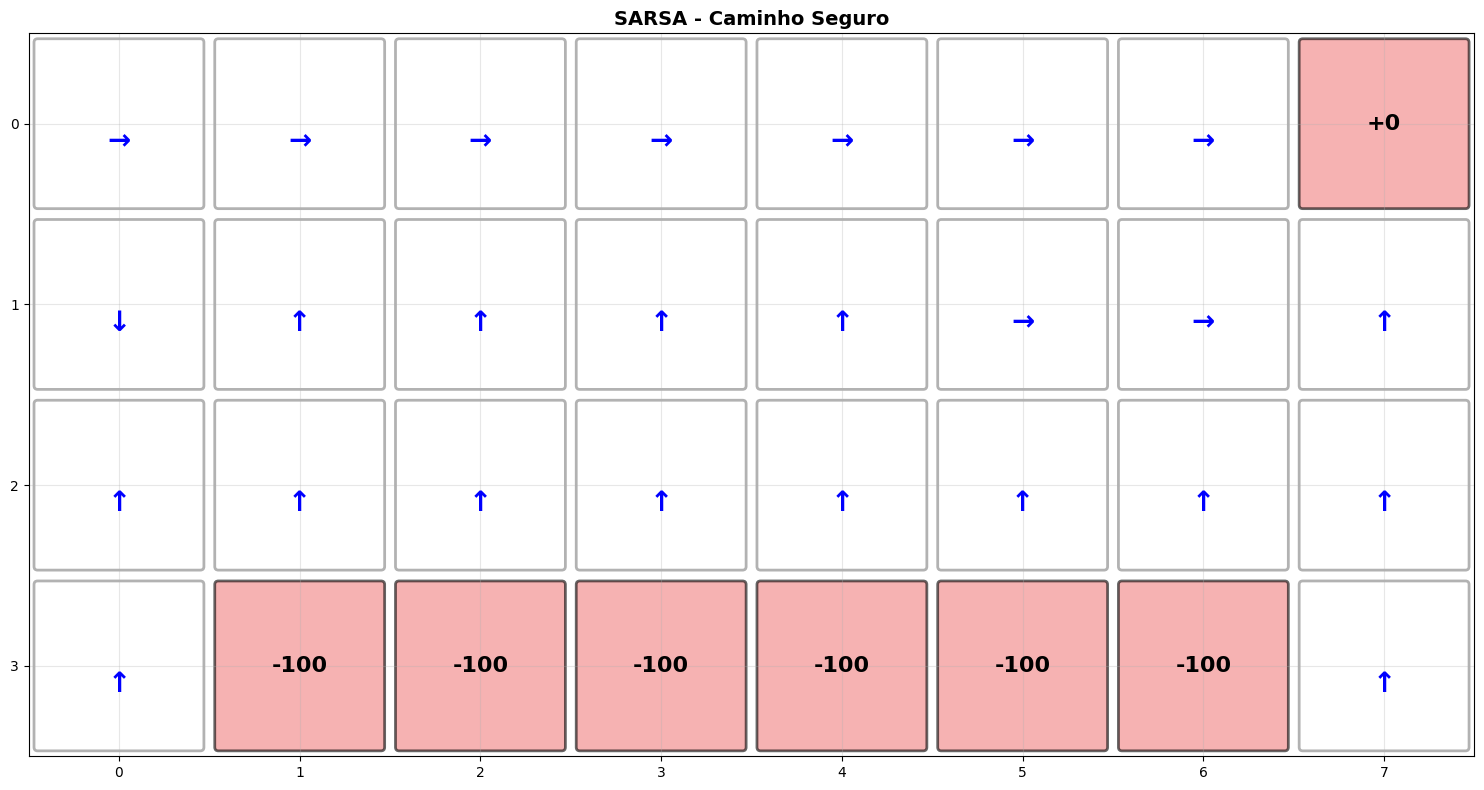

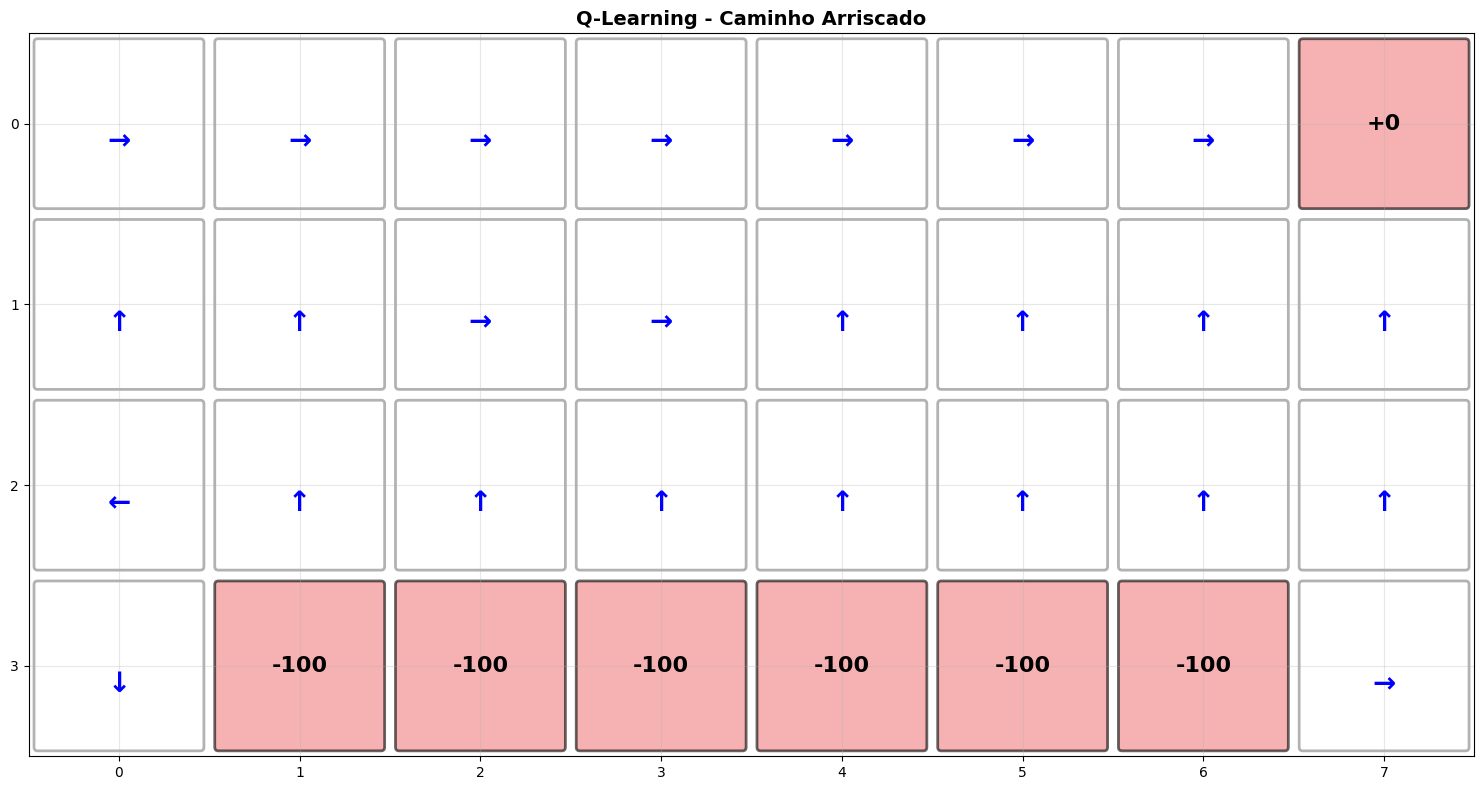

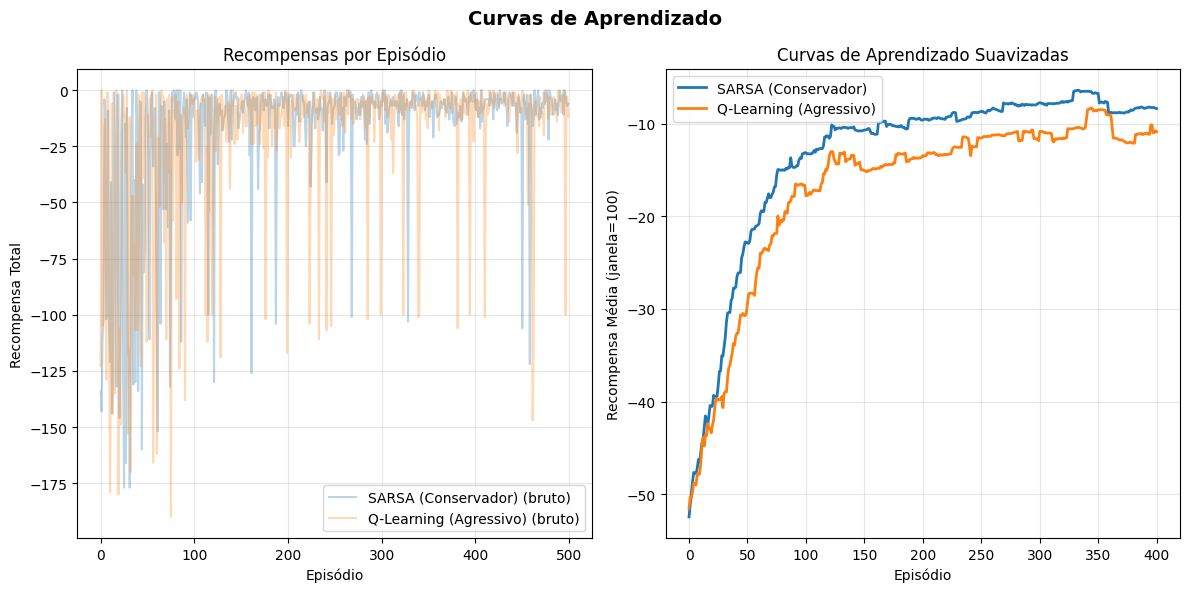

In [14]:
### Experimento 2: SARSA vs Q-Learning no Cliff

# Configuração arriscada
gw = create_cliff_world(
    cliff_reward=-100.0,
    living_reward=-1.0,
    noise=0.1
)

# SARSA (conservador)
Q_sarsa, rewards_sarsa = sarsa(gw, n_episodes=500, epsilon=0.1)

# Q-Learning (agressivo)
Q_qlearning, rewards_qlearning = q_learning(gw, n_episodes=500, epsilon=0.1)

# Comparar
from visualization import visualize_gridworld
from algorithms import get_greedy_policy

policy_sarsa = get_greedy_policy(Q_sarsa, gw)
policy_qlearning = get_greedy_policy(Q_qlearning, gw)

visualize_gridworld(gw, policy=policy_sarsa, title="SARSA - Caminho Seguro")
visualize_gridworld(gw, policy=policy_qlearning, title="Q-Learning - Caminho Arriscado")

plot_learning_curves({
    'SARSA (Conservador)': rewards_sarsa,
    'Q-Learning (Agressivo)': rewards_qlearning
})

### Experimento 3: Efeito do Ruído

```python
# Comparar determinístico vs estocástico
noise_levels = [0.0, 0.1, 0.2, 0.3]
results = {}

for noise in noise_levels:
    gw = create_cliff_world(noise=noise)
    Q, rewards = q_learning(gw, n_episodes=500)
    results[f'Ruído={noise}'] = rewards

plot_learning_curves(results, title="Efeito do Ruído no Aprendizado")
```

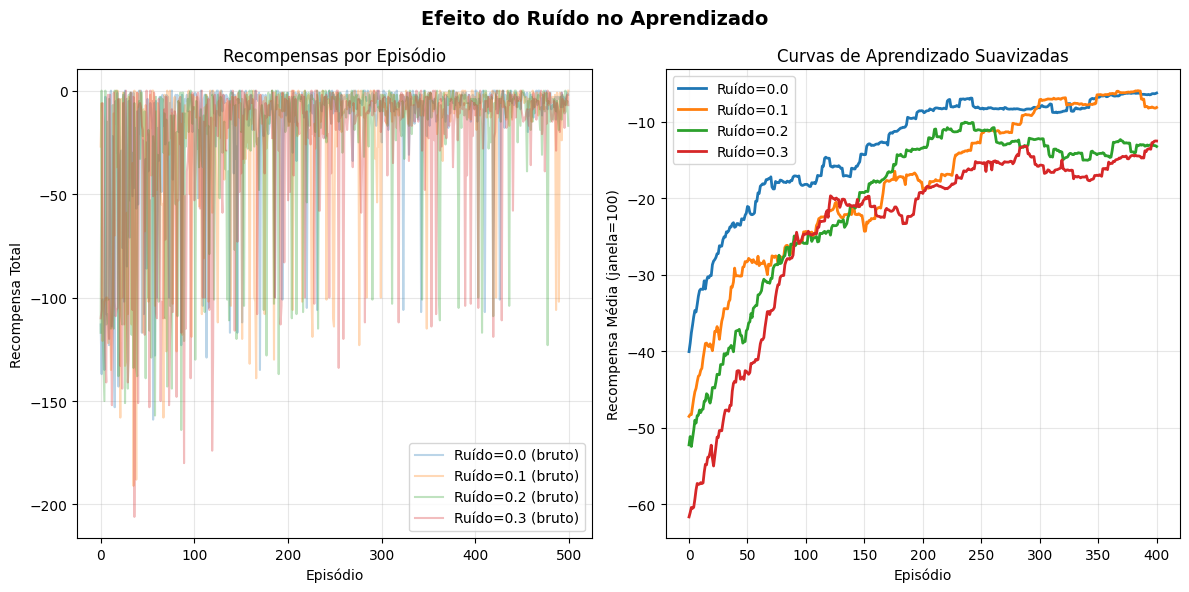

In [15]:
# Comparar determinístico vs estocástico
noise_levels = [0.0, 0.1, 0.2, 0.3]
results = {}

for noise in noise_levels:
    gw = create_cliff_world(noise=noise)
    Q, rewards = q_learning(gw, n_episodes=500)
    results[f'Ruído={noise}'] = rewards

plot_learning_curves(results, title="Efeito do Ruído no Aprendizado")

---

## 🎓 Dominando Conceitos do RL

### Para Entender Exploração vs Exploitation

```python
# Cliff com objetivo muito positivo
gw = create_cliff_world(
    goal_reward=100.0,      # Objetivo tentador
    cliff_reward=-100.0,    # Cliff perigoso
    living_reward=-1.0
)

# Comparar diferentes epsilons
for eps in [0.0, 0.1, 0.3]:
    Q, rewards = q_learning(gw, epsilon=eps, n_episodes=500)
    print(f"Epsilon={eps}: Média final = {np.mean(rewards[-50:]):.2f}")
```

In [16]:
# Cliff com objetivo muito positivo
import numpy as np

gw = create_cliff_world(
    goal_reward=100.0,      # Objetivo tentador
    cliff_reward=-100.0,    # Cliff perigoso
    living_reward=-1.0
)

# Comparar diferentes epsilons
for eps in [0.0, 0.1, 0.3, 0.5]:
    Q, rewards = q_learning(gw, epsilon=eps, n_episodes=500)
    print(f"Epsilon={eps}: Média final = {np.mean(rewards[-50:]):.2f}")

Epsilon=0.0: Média final = 96.10
Epsilon=0.1: Média final = 95.76
Epsilon=0.3: Média final = 80.98
Epsilon=0.5: Média final = 80.42


## 🔍 Análise Avançada

### Criar Cliff Customizado Manualmente

Se quiser controle total, crie manualmente:

```python
from environment import GridWorld

# Criar grid vazio
gw = GridWorld(rows=5, cols=10, gamma=0.9, noise=0.0)

# Adicionar cliff onde você quiser
gw.set_terminal(4, 2, -100.0)
gw.set_terminal(4, 3, -100.0)
gw.set_terminal(4, 4, -100.0)
gw.set_terminal(4, 5, -100.0)

# Adicionar múltiplos objetivos
gw.set_terminal(0, 9, 10.0)   # Objetivo principal
gw.set_terminal(2, 5, 5.0)    # Objetivo secundário

# Adicionar paredes
gw.set_wall(2, 2)
gw.set_wall(2, 3)

# Configurar custo
gw.living_reward = -0.5
```

In [17]:
from environment import GridWorld

# Criar grid vazio
gw = GridWorld(rows=5, cols=10, gamma=0.9, noise=0.0)

# Adicionar cliff onde você quiser
gw.set_terminal(4, 2, -100.0)
gw.set_terminal(4, 3, -100.0)
gw.set_terminal(4, 4, -100.0)
gw.set_terminal(4, 5, -100.0)

# Adicionar múltiplos objetivos
gw.set_terminal(0, 9, 10.0)   # Objetivo principal
gw.set_terminal(2, 5, 5.0)    # Objetivo secundário

# Adicionar paredes
gw.set_wall(2, 2)
gw.set_wall(2, 3)

# Configurar custo
gw.living_reward = -0.5

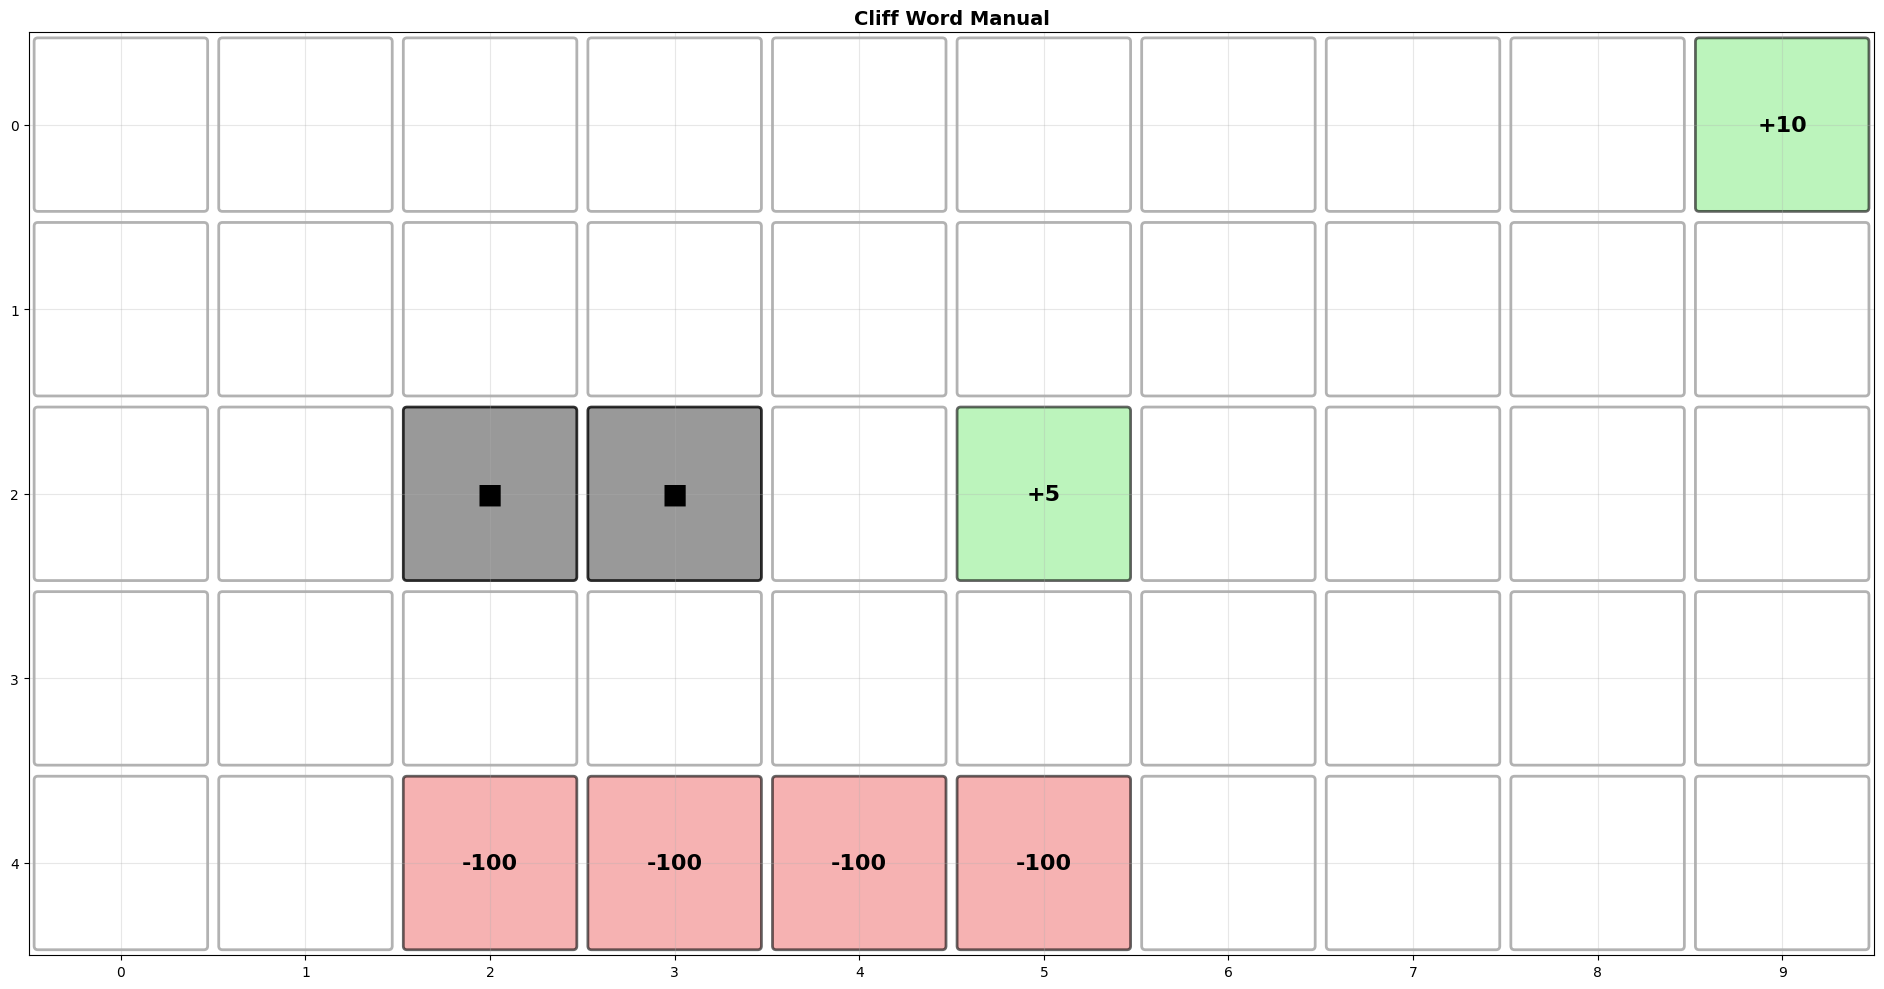

In [18]:
visualize_gridworld(gw, title='Cliff Word Manual')

### Cliff com Formato Diferente

```python
# Cliff no meio do grid (não só embaixo)
gw = GridWorld(5, 10, gamma=0.9, noise=0.0)

# Cliff vertical no meio
for row in range(1, 4):
    gw.set_terminal(row, 5, -100.0)

# Start
# (4, 0) por padrão

# Goal
gw.set_terminal(0, 9, 10.0)

gw.living_reward = -1.0
```

In [19]:
# Cliff no meio do grid (não só embaixo)
gw = GridWorld(5, 10, gamma=0.9, noise=0.0)

# Cliff vertical no meio
for row in range(1, 4):
    gw.set_terminal(row, 5, -100.0)

# Start
# (4, 0) por padrão

# Goal
gw.set_terminal(0, 9, 10.0)

gw.living_reward = -1.0

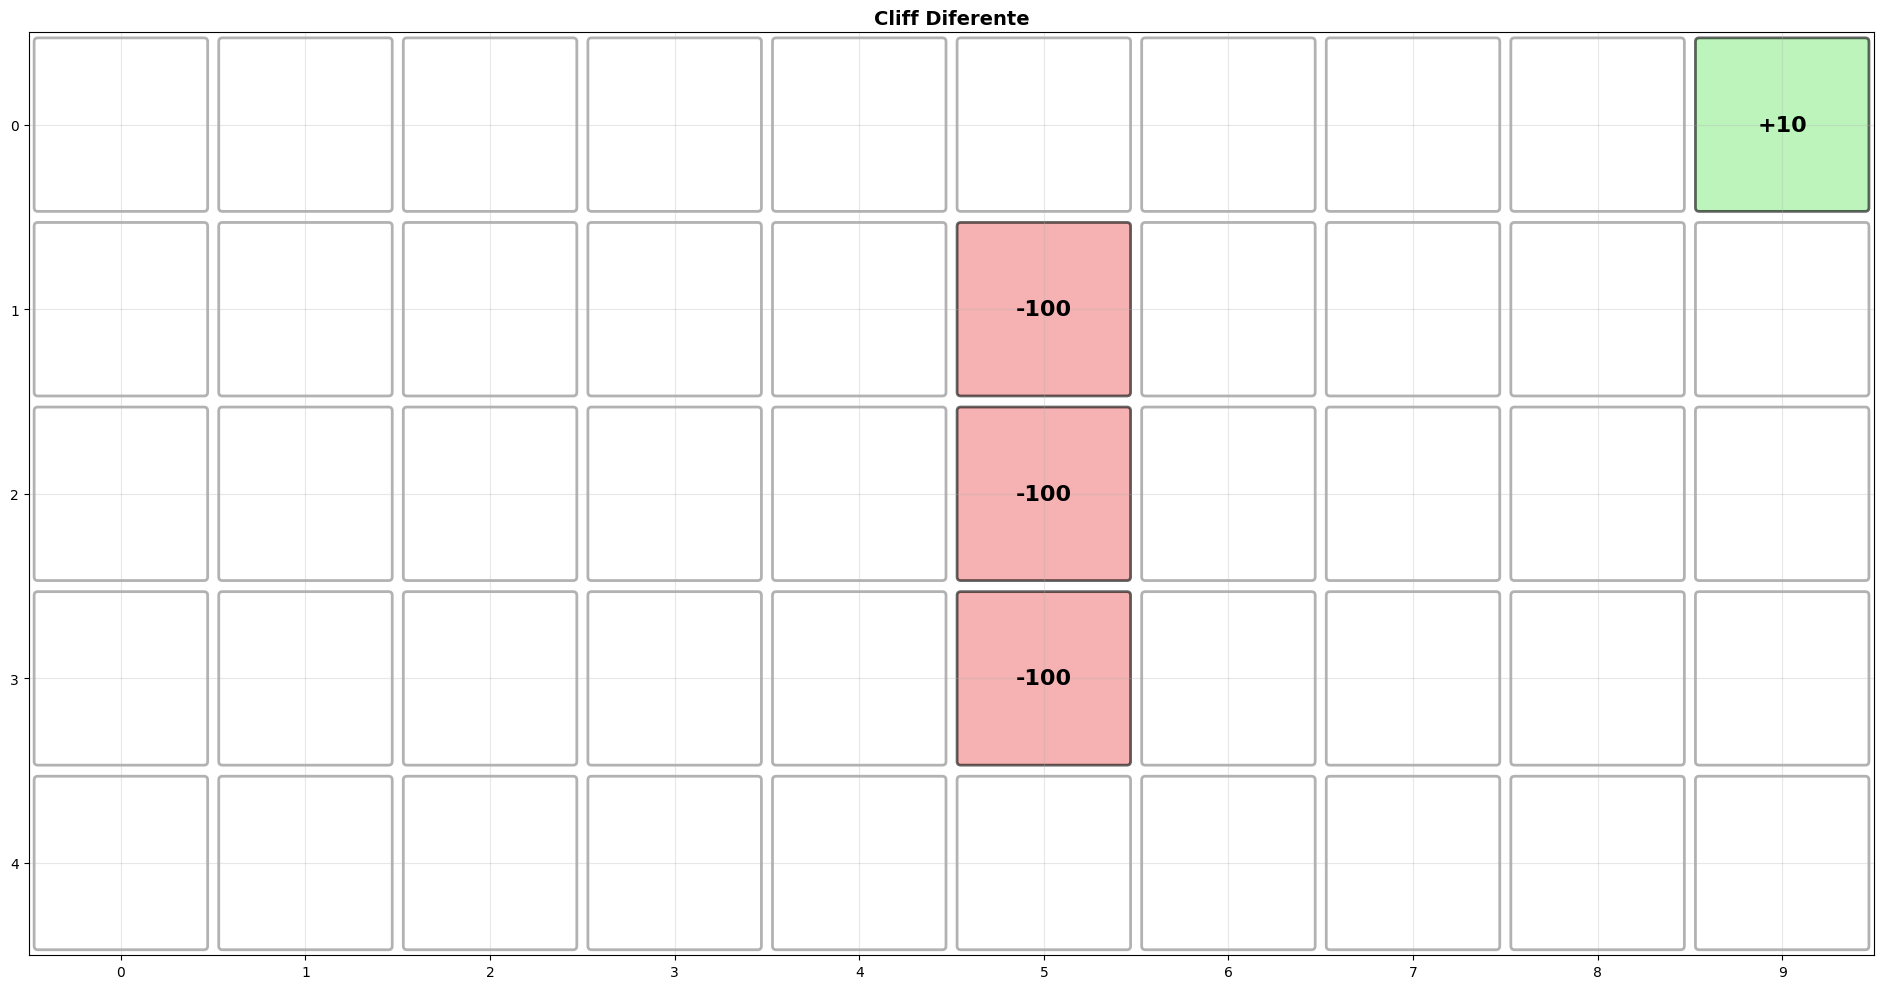

In [20]:
visualize_gridworld(gw, title='Cliff Diferente')

---

## 💡 Dicas Importantes

### 1. **Living Reward e Gamma**

A combinação desses parâmetros afeta muito o comportamento:

```python
# Episódios curtos (urgência)
gw = create_cliff_world(living_reward=-5.0, gamma=0.9)

# Episódios médios (equilíbrio)
gw = create_cliff_world(living_reward=-1.0, gamma=0.9)

# Pode demorar (sem urgência)
gw = create_cliff_world(living_reward=-0.1, gamma=0.99)
```

### 2. **Cliff Reward vs Living Reward**

O **balanço** é importante:

```python
# Cliff muito pior que custo de viver → caminho seguro
gw = create_cliff_world(cliff_reward=-100.0, living_reward=-1.0)

# Cliff similar ao custo total → pode arriscar
gw = create_cliff_world(cliff_reward=-20.0, living_reward=-2.0)
```

### 3. **Tamanho do Grid**

Grids maiores demoram mais para convergir:

```python
# Rápido (< 500 episódios)
gw = create_cliff_world(rows=3, cols=5)

# Moderado (500-1000 episódios)
gw = create_cliff_world(rows=4, cols=8)  # Padrão

# Lento (1000-5000 episódios)
gw = create_cliff_world(rows=8, cols=16)
```

---

## 📝 Template para Experimentos

```python
from environment import create_cliff_world
from algorithms import q_learning, get_greedy_policy
from visualization import visualize_gridworld, plot_learning_curves

# 1. CRIAR AMBIENTE CUSTOMIZADO
gw = create_cliff_world(
    rows=4,                  # Ajuste aqui
    cols=8,                  # Ajuste aqui
    cliff_reward=-100.0,     # Ajuste aqui
    goal_reward=0.0,         # Ajuste aqui
    living_reward=-1.0,      # Ajuste aqui
    gamma=0.9,               # Ajuste aqui
    noise=0.0                # Ajuste aqui
)

# 2. VISUALIZAR AMBIENTE
from environment import print_gridworld_info
print_gridworld_info(gw)
visualize_gridworld(gw, title="Meu Cliff World Customizado")

# 3. TREINAR
Q, rewards = q_learning(
    gw,
    n_episodes=1000,
    alpha=0.1,
    epsilon=0.1,
    verbose=True
)

# 4. VISUALIZAR RESULTADOS
policy = get_greedy_policy(Q, gw)
visualize_gridworld(gw, policy=policy, title="Política Aprendida")
plot_learning_curves({'Q-Learning': rewards})

# 5. ANÁLISE
print(f"\nRecompensa média final: {np.mean(rewards[-100:]):.2f}")
print(f"Melhor recompensa: {max(rewards):.2f}")
print(f"Pior recompensa: {min(rewards):.2f}")
```

In [21]:
from environment import create_cliff_world
from algorithms import q_learning, get_greedy_policy
from visualization import visualize_gridworld, plot_learning_curves

# 1. CRIAR AMBIENTE CUSTOMIZADO
gw = create_cliff_world(
    rows=4,                  # Ajuste aqui
    cols=8,                  # Ajuste aqui
    cliff_reward=-100.0,     # Ajuste aqui
    goal_reward=0.0,         # Ajuste aqui
    living_reward=-1.0,      # Ajuste aqui
    gamma=0.9,               # Ajuste aqui
    noise=0.0                # Ajuste aqui
)

INFORMAÇÕES DO GRIDWORLD
Dimensões: 4 linhas x 8 colunas
Total de estados: 32
Paredes: 0
Estados terminais: 7
Fator de desconto (γ): 0.9
Ruído: 0.0
Living reward: -1.0
Ações disponíveis: ['N', 'S', 'L', 'O']

Estados terminais:
  (0, 7): reward = 0.0
  (3, 1): reward = -100.0
  (3, 2): reward = -100.0
  (3, 3): reward = -100.0
  (3, 4): reward = -100.0
  (3, 5): reward = -100.0
  (3, 6): reward = -100.0


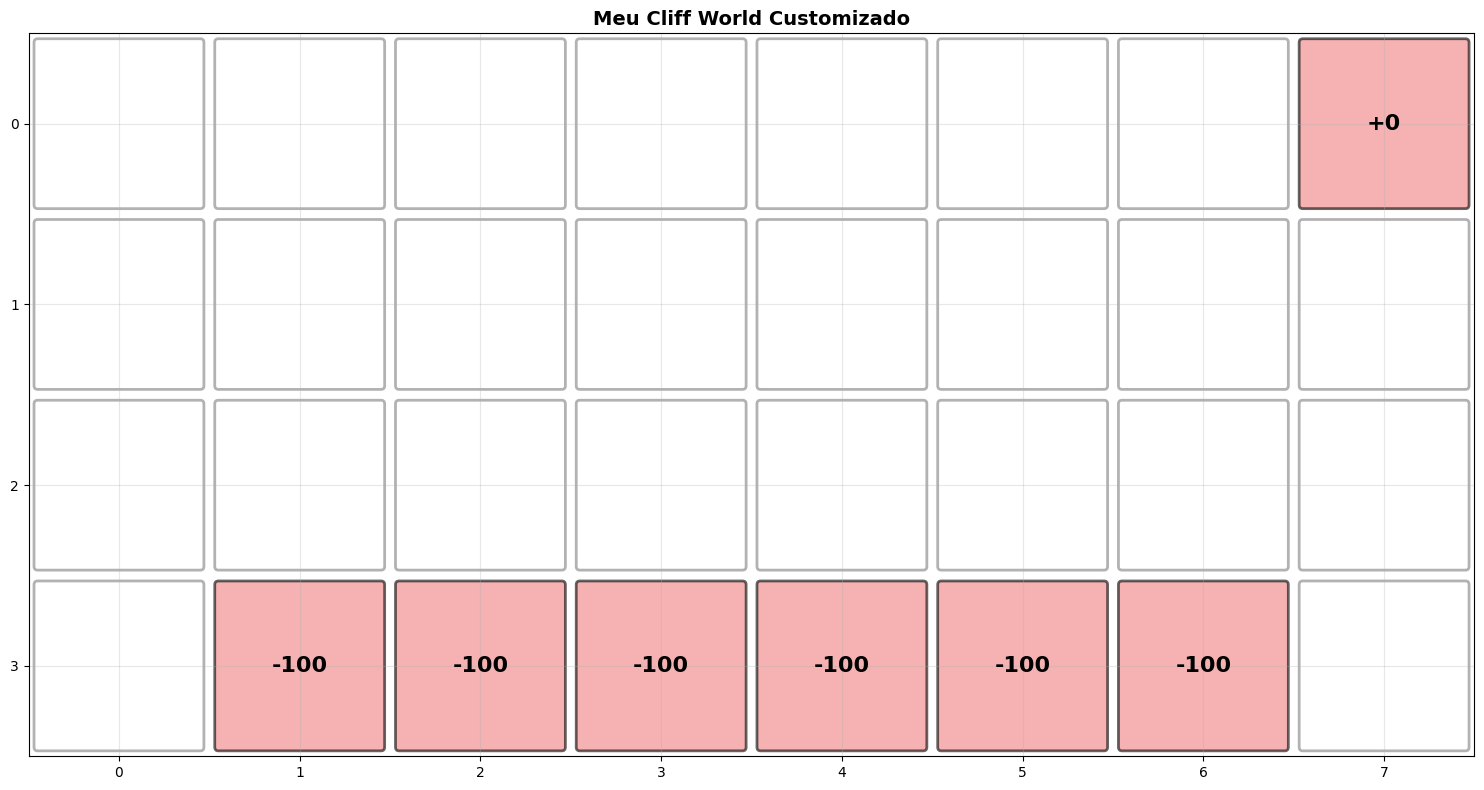

In [22]:
# 2. VISUALIZAR AMBIENTE
from environment import print_gridworld_info
print_gridworld_info(gw)
visualize_gridworld(gw, title="Meu Cliff World Customizado")

In [23]:
# 3. TREINAR
Q, rewards = q_learning(
    gw,
    n_episodes=1000,
    alpha=0.1,
    epsilon=0.1,
    verbose=True
)

Episódio 100/1000 - Reward médio: -44.18
Episódio 200/1000 - Reward médio: -16.18
Episódio 300/1000 - Reward médio: -13.39
Episódio 400/1000 - Reward médio: -7.37
Episódio 500/1000 - Reward médio: -8.61
Episódio 600/1000 - Reward médio: -10.21
Episódio 700/1000 - Reward médio: -7.19
Episódio 800/1000 - Reward médio: -8.25
Episódio 900/1000 - Reward médio: -6.16
Episódio 1000/1000 - Reward médio: -6.75


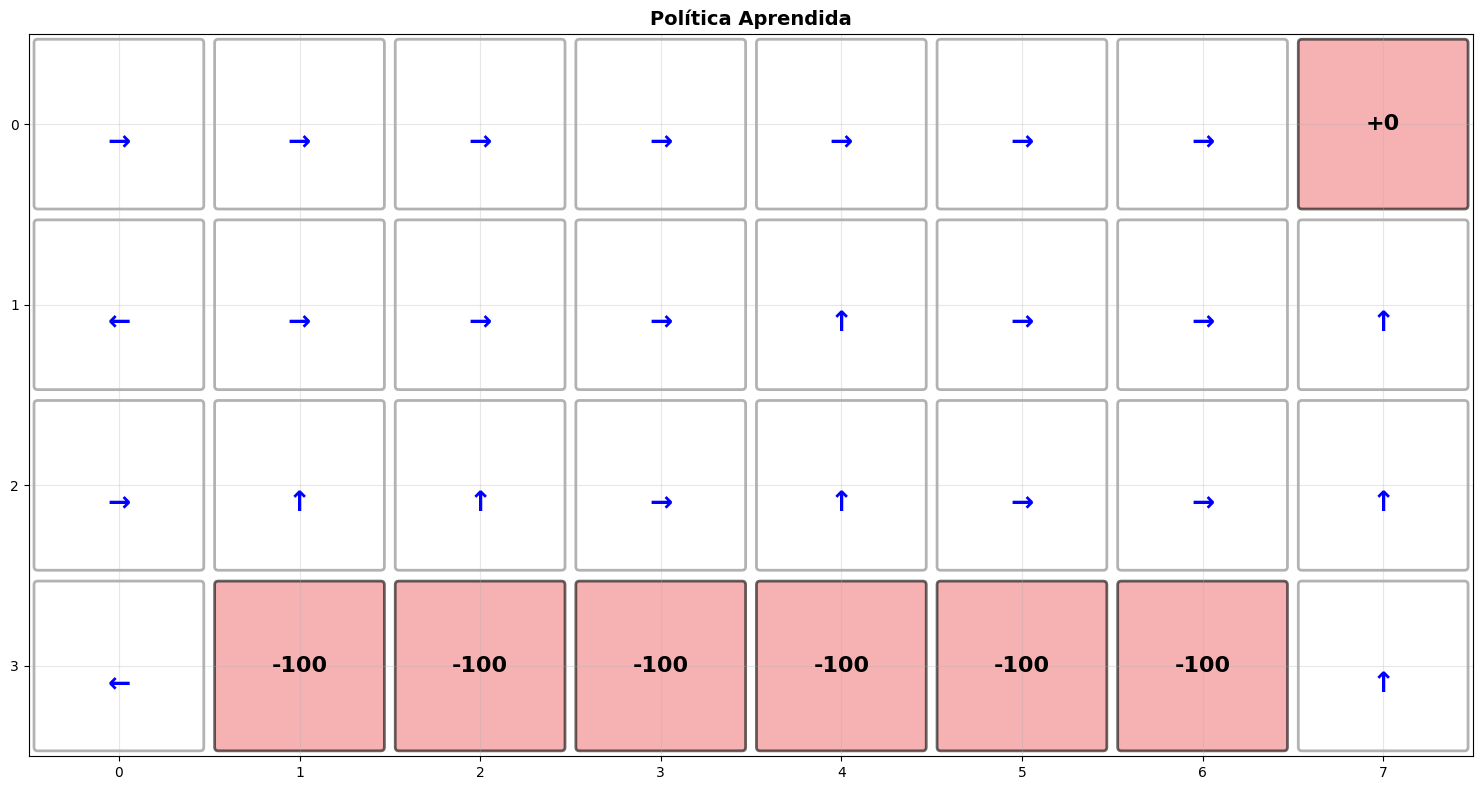

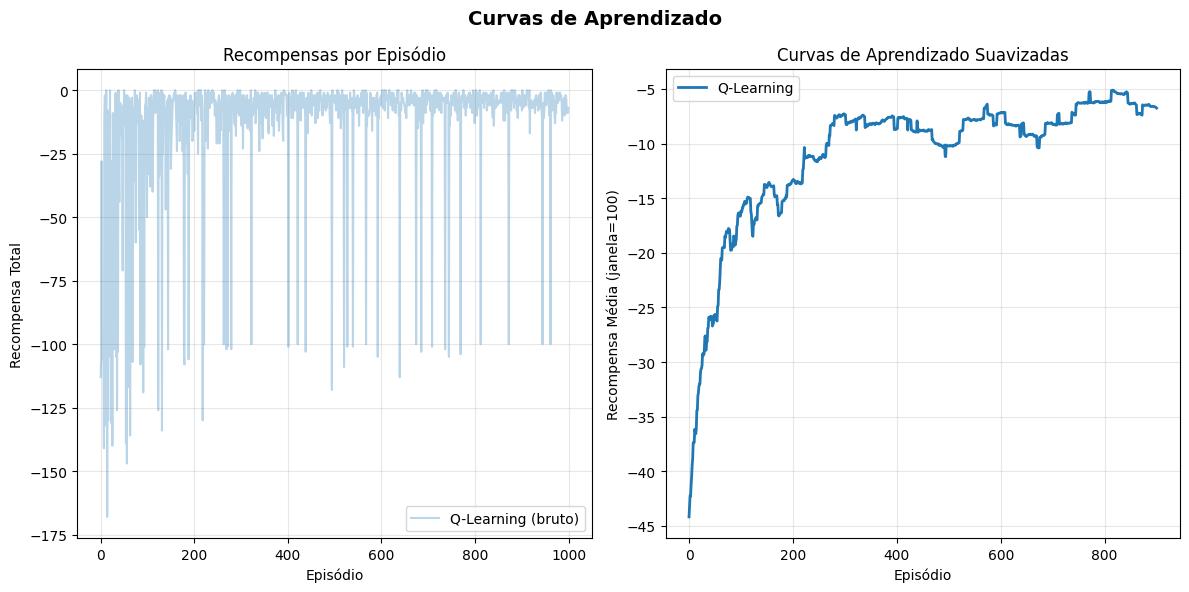

In [24]:
# 4. VISUALIZAR RESULTADOS
policy = get_greedy_policy(Q, gw)
visualize_gridworld(gw, policy=policy, title="Política Aprendida")
plot_learning_curves({'Q-Learning': rewards})

In [25]:
# 5. ANÁLISE
print(f"\nRecompensa média final: {np.mean(rewards[-100:]):.2f}")
print(f"Melhor recompensa: {max(rewards):.2f}")
print(f"Pior recompensa: {min(rewards):.2f}")


Recompensa média final: -6.75
Melhor recompensa: 0.00
Pior recompensa: -168.00


---

## 🎯 Resumo Rápido

### Parâmetros Principais:

| Parâmetro | Efeito | Valores Típicos |
|-----------|--------|-----------------|
| `rows`, `cols` | Tamanho | 3-8, 5-16 |
| `cliff_reward` | Penalidade | -10 a -200 |
| `goal_reward` | Prêmio | 0 a 100 |
| `living_reward` | Custo/passo | -5 a 0 |
| `gamma` | Desconto | 0.9 a 0.99 |
| `noise` | Estocasticidade | 0.0 a 0.3 |

### Configurações Prontas:

```python
# Fácil
gw_easy = create_cliff_world(cliff_reward=-20, goal_reward=10, living_reward=-0.5)

# Padrão
gw_standard = create_cliff_world()

# Difícil
gw_hard = create_cliff_world(rows=6, cols=12, cliff_reward=-200, living_reward=-5, noise=0.2)

# Mini (teste rápido)
gw_mini = create_cliff_world(rows=3, cols=5)
```